데이터 개요
====
1. 사용데이터  
[Kaggle Competition Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats).

2. 학습 진행과정(데이터)
위의 데이터를 사용할 경우 train의 경우 25000개의 이미지가 들어있으며 test의 경우 12500개의 이미지가 존재  
그 중에서 train데이터의 디렉토리에 각각의 파일에 해당 이미지의 레이블이 있기 때문에 train 데이터에서 일부데이터를 가져와서 진행  
현 코드에서는 train에 200개의 데이터 validation 및 test 이미지의 경우 각각 100개의 이미지로 구성  
각각의 데이터셋의 개와 고양이의 비율은 1:1로 설정하여 특정 레이블이 많은 경우가 없도록 설정

3. 학습 진행과정(학습)
VGG16의 모델을 기반으로 FC 및 Average Pooling에 따른 성능차이 확인 및 SVM을 통한 성능 추가 확인

In [28]:
# Create smaller dataset for Dogs vs. Cats
import os, shutil

original_dataset_dir = 'train/'

base_dir = '/'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Create directories
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')     
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

# Copy first 100 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 50 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(200, 250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 50 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(250,300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 100 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
                                                
# Copy next 50 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(200,250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 50 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(250,300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
                                                
# Sanity checks
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 100
total training dog images: 100
total validation cat images: 50
total validation dog images: 50
total test cat images: 50
total test dog images: 50


In [2]:
img_width, img_height = 224, 224 #VGG 16의 default input
train_size = 200
validation_size = 100
test_size = 100

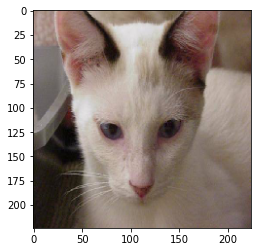

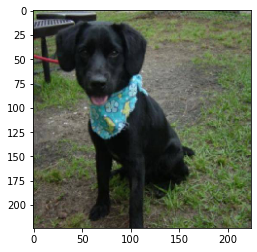

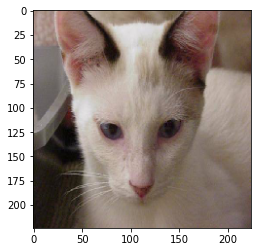

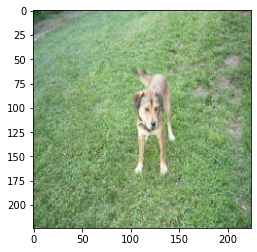

In [3]:
# Show pictures
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()
    
for i in range(0,2):
    show_pictures(train_cats_dir)
    show_pictures(train_dogs_dir)

In [4]:
# Instantiate convolutional base
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))  # 3 = number of channels in RGB pictures


VGG16 사용에 설정한 파라미터
====
1. weights : Imagenet에서 사용하는 weight 파라미터를 가져옴  

2. include_top : VGG16이 1000 개의 클래스를 분류하지만 현재 데이터에서는 binary 분류이기 때문에 value를 false로 처리하여서 분류되는거 방지  

3. VGG16의 경우 224,224,3 의 형태이지만 다른 크기로 설정해도 train 가능

![VGG16 Structure](VGG16.png)

In [5]:
# Check architecture
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# Extract features
import os, shutil
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count): #sample count = each set data amount
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_size = 200
validation_size = 100
test_size = 100

train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [9]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
7/7 [==============================] - 2s 228ms/step - loss: 1.8569 - acc: 0.5173 - val_loss: 0.7236 - val_acc: 0.6200
Epoch 2/100
7/7 [==============================] - 0s 58ms/step - loss: 0.8722 - acc: 0.6733 - val_loss: 0.7213 - val_acc: 0.8200
Epoch 3/100
7/7 [==============================] - 0s 59ms/step - loss: 0.3460 - acc: 0.8998 - val_loss: 0.9489 - val_acc: 0.7500
Epoch 4/100
7/7 [==============================] - 0s 57ms/step - loss: 0.4881 - acc: 0.8604 - val_loss: 0.7887 - val_acc: 0.7000
Epoch 5/100
7/7 [==============================] - 0s 61ms/step - loss: 0.2669 - acc: 0.8978 - val_loss: 0.7379 - val_acc: 0.7900
Epoch 6/100
7/7 [==============================] - 0s 59ms/step - loss: 0.1126 - acc: 0.9639 - val_loss: 0.4769 - val_acc: 0.8400
Epoch 7/100
7/7 [==============================] - 0s 60ms/step - loss: 0.0598 - acc: 0.9822 - val_loss: 0.5511 - val_acc: 0.8300
Epoch 8/100
7/7 [==============================] - 0s 53ms/step - loss: 0.0417 - acc: 0.9

In [ ]:
# Save model
model.save('dogs_cat_fcl.h5')

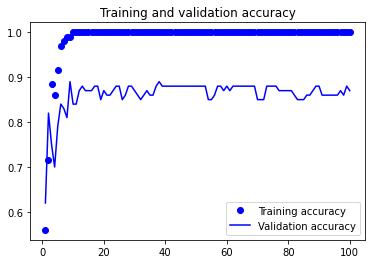

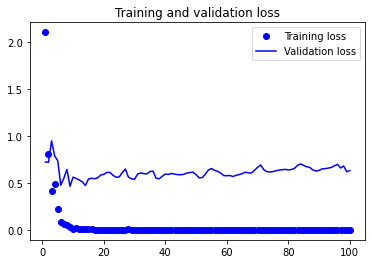

In [10]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# Define function to visualize predictions
def visualize_predictions(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([test_cats_dir, test_dogs_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction < 0.5:
            print('Cat')
        else:
            print('Dog')

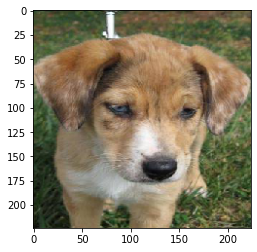

Dog


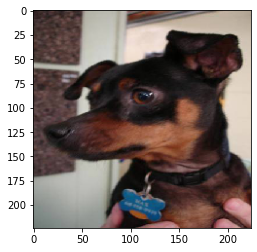

Dog


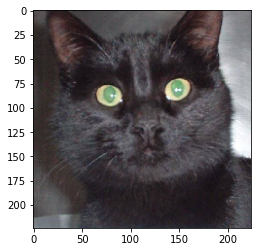

Cat


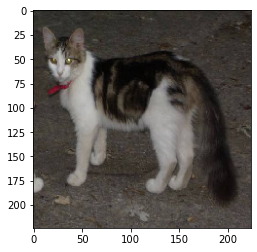

Dog


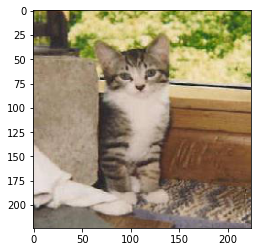

Cat


In [12]:
# Visualize predictions
visualize_predictions(model, 5)

In [13]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [15]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 0.7105 - acc: 0.5327 - val_loss: 0.6885 - val_acc: 0.5300
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6888 - acc: 0.5179 - val_loss: 0.6784 - val_acc: 0.5800
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6880 - acc: 0.5776 - val_loss: 0.6793 - val_acc: 0.5500
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6835 - acc: 0.5192 - val_loss: 0.6707 - val_acc: 0.5800
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6757 - acc: 0.5821 - val_loss: 0.6595 - val_acc: 0.6600
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6615 - acc: 0.6942 - val_loss: 0.6532 - val_acc: 0.7100
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6549 - acc: 0.6640 - val_loss: 0.6473 - val_acc: 0.7300
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6456 - acc: 0.68

In [16]:
# Save model
model.save('dogs_cat_gap.h5')

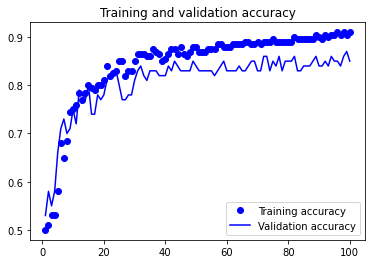

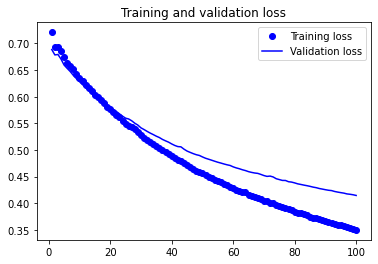

In [17]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

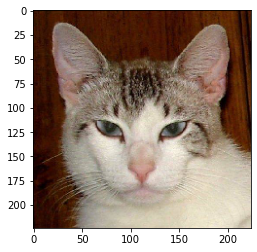

Cat


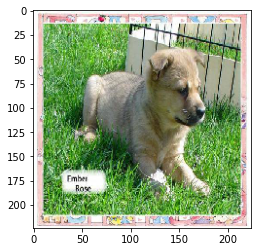

Dog


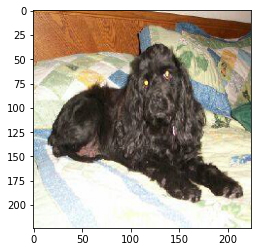

Dog


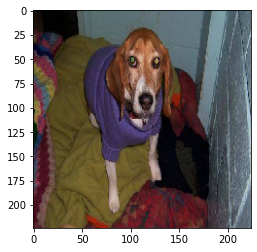

Dog


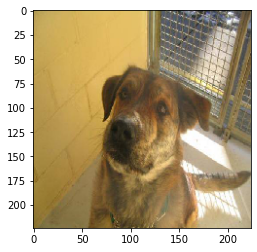

Cat


In [18]:
# Visualize predictions
visualize_predictions(model, 5)

In [19]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))

In [22]:
# Build model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

X_train, y_train = svm_features.reshape(300,7*7*512), svm_labels

param = [{
          "C": [0.01, 0.1, 1, 10, 100]
         }]
 
svm = LinearSVC(penalty='l2', loss='squared_hinge')  # As in Tang (2013)
clf = GridSearchCV(svm, param, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}])

In [23]:
# Save model
model.save('dogs_cat_svm.h5')

In [24]:
# Evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print("\nAccuracy score (mean):")
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
print("\nAccuracy score (standard deviation):")
print(np.std(cross_val_score(clf, X_train, y_train, cv=10)))


Accuracy score (mean):
0.8633333333333333

Accuracy score (standard deviation):
0.048189440982669855


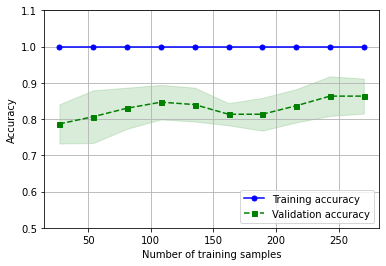

In [26]:
# Plot learning curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = clf,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()

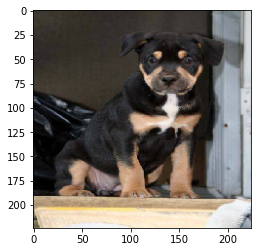

Cat


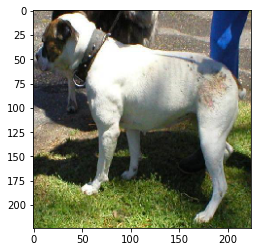

Dog


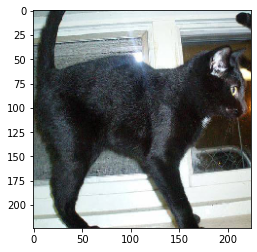

Cat


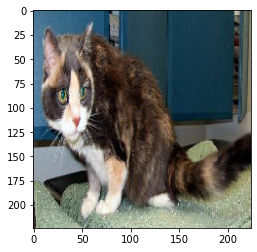

Cat


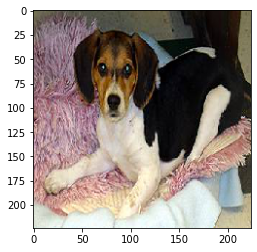

Dog


In [27]:
# Visualize predictions
visualize_predictions(clf, 5)